<h1 style="text-align: center;">Apple Stock Analysis</h1>

## 1) Import packages

In [ ]:
import requests
import json

import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import yfinance as yf

In [ ]:
# Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive at '/content/drive'
drive.mount('/content/drive')

# Navigate to the desired directory in Google Drive
%cd /content/drive/MyDrive/data400

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data400


## 2) Data Retreival

In [ ]:
import yfinance as yf
import pandas as pd

# Function to get the list of S&P 500 tickers
def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url)
    sp500_table = table[0]
    tickers = sp500_table['Symbol'].tolist()
    return tickers

# Function to calculate additional metrics
def calculate_technical_indicators(df):
    # Calculate SMA (Simple Moving Average)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # Calculate EMA (Exponential Moving Average)
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Calculate RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calculate MACD and Signal line
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    df['Middle_Band'] = df['Close'].rolling(window=20).mean()
    df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=20).std() * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=20).std() * 2)

    return df

# Function to get historical data for S&P 500 companies
def get_sp500_historical_data(start_date="2010-01-01", end_date=None):
    tickers = get_sp500_tickers()
    all_data = []

    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                hist.reset_index(inplace=True)  # Reset the index to make 'Date' a column
                hist.sort_values(by='Date', ascending=False, inplace=True)
                hist['Ticker'] = ticker  # Add the ticker symbol as a column
                hist = calculate_technical_indicators(hist)  # Add technical indicators
                all_data.append(hist)
            else:
                print(f"No data for {ticker}")
        except Exception as e:
            print(f"Error retrieving data for {ticker}: {e}")

    if all_data:
        # Concatenate all the data into a single DataFrame
        full_data = pd.concat(all_data, ignore_index=True)
        return full_data
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data is found

# Main script
if __name__ == "__main__":
    sp500_historical_data = get_sp500_historical_data()


ERROR:yfinance:$BRK.B: possibly delisted; no timezone found


No data for BRK.B


ERROR:yfinance:$BF.B: possibly delisted; no price data found  (1d 2010-01-01 -> 2024-12-14)


No data for BF.B


In [ ]:
sp500_historical_data.to_csv("stock.csv")

In [ ]:
aapl = yf.Ticker("AAPL")
apple_info = aapl.info
apple_info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currenc

## 3) General Company Analysis

### a) Company General Info

In [ ]:
apple_info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple P

### b) Market Resarch

#### i) S&P500

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
start_date = "2020-01-01"
end_date = "2024-11-01"
sp500_data = sp500.history(start=start_date, end=end_date)

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame with the stock data
df = pd.DataFrame(sp500_data)
df.reset_index(inplace=True)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

# Customize the layout
fig.update_layout(
    title='Stock Price',
    yaxis_title='Price (USD)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False
)

# Add range selector
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(visible=True),
        rangeslider=dict(visible=True)
    )
)

# Display the chart
fig.show()

In [ ]:
# Calculate the close price difference
df['Close_Diff'] = df['Close'].diff()

# Create subplots: one for closing price, one for difference
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Closing Price', 'Close Price Difference'))

# Add closing price trace
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Closing Price'
), row=1, col=1)

# Add close price difference trace
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['Close_Diff'],
    name='Close Diff',
    marker_color=df['Close_Diff'].apply(lambda x: 'green' if x >= 0 else 'red')
), row=2, col=1)

# Update layout
fig.update_layout(
    title='Stock Closing Price and Daily Difference',
    height=800,  # Increase height to accommodate two subplots
    showlegend=False
)

# Update y-axis labels
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Price Difference (USD)", row=2, col=1)

# Add range selector
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
    row=1, col=1
)

# Add range slider
fig.update_xaxes(rangeslider_visible=True, row=2, col=1)

# Update x-axis label
fig.update_xaxes(title_text="Date", row=2, col=1)

# Display the chart
fig.show()

#### ii) Sector Analysis

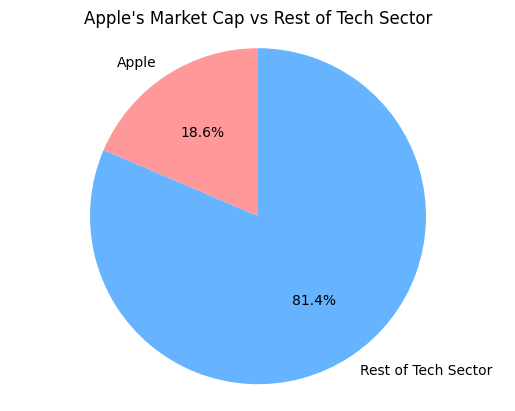

Apple's market cap is 18.56% of the technology sector


In [ ]:
sector = apple_info['sectorKey']
sector_info = yf.Sector(sector)
sector_info = sector_info.overview

apple_market_cap = apple_info['marketCap']
sector_market_cap = sector_info['market_cap']
rest_of_sector = sector_market_cap - apple_market_cap

# Create pie chart
sizes = [apple_market_cap, rest_of_sector]
labels = ['Apple', 'Rest of Tech Sector']
colors = ['#ff9999', '#66b3ff']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title("Apple's Market Cap vs Rest of Tech Sector")
plt.show()

# Print the percentage
apple_percentage = (apple_market_cap / sector_market_cap) * 100
print(f"Apple's market cap is {apple_percentage:.2f}% of the technology sector")

#### iii) Industry analysis

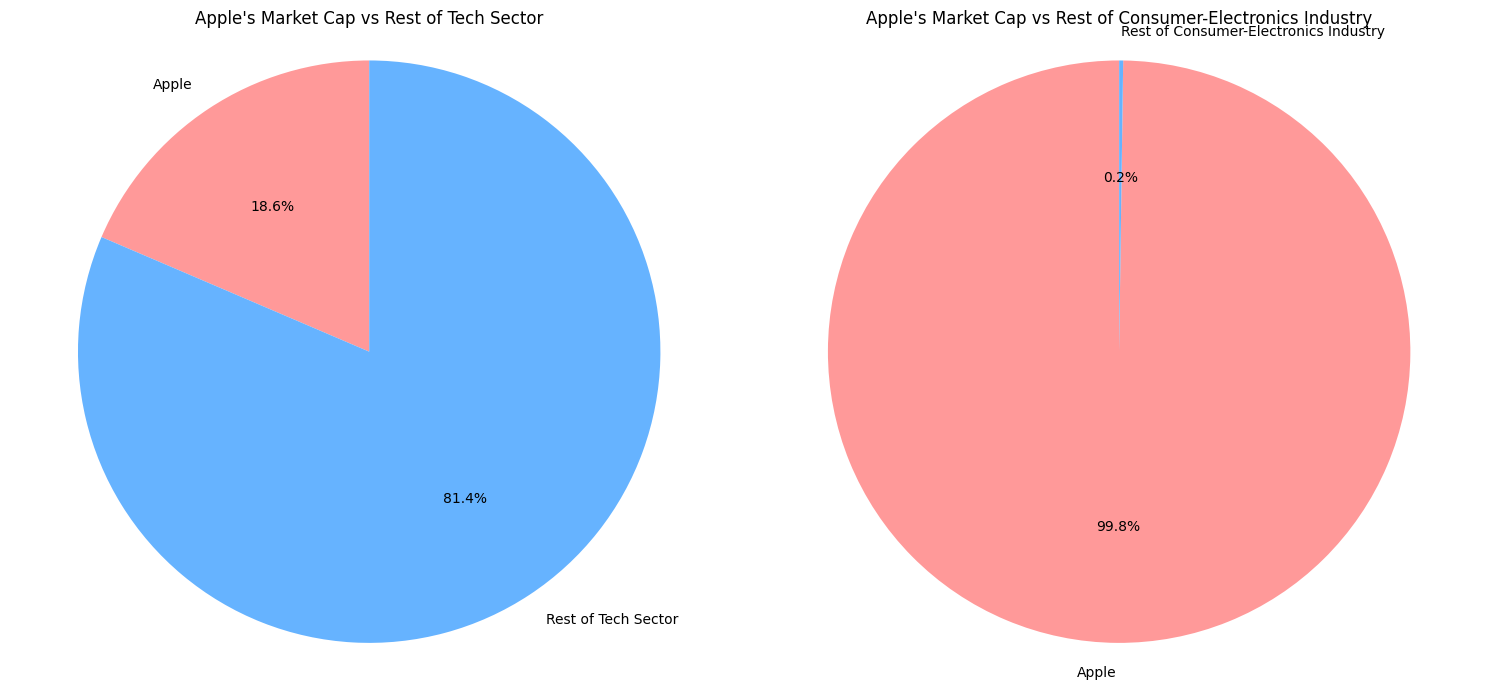

Apple's market cap is 18.56% of the technology sector
Apple's market cap is 99.78% of the Consumer-Electronics industry


In [ ]:
import matplotlib.pyplot as plt

# Prepare data for sector comparison
sector = apple_info['sectorKey']
sector_info = yf.Sector(sector)
sector_info = sector_info.overview

apple_market_cap = apple_info['marketCap']
sector_market_cap = sector_info['market_cap']
rest_of_sector = sector_market_cap - apple_market_cap

sector_sizes = [apple_market_cap, rest_of_sector]
sector_labels = ['Apple', 'Rest of Tech Sector']

# Prepare data for industry comparison
industry = apple_info['industryKey']
ind_info = yf.Industry(industry)
ind_info = ind_info.overview

ind_market_cap = ind_info['market_cap']
rest_of_ind = ind_market_cap - apple_market_cap

ind_sizes = [apple_market_cap, rest_of_ind]
ind_labels = ['Apple', 'Rest of Consumer-Electronics Industry']

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Colors for both charts
colors = ['#ff9999', '#66b3ff']

# Plot sector comparison
ax1.pie(sector_sizes, labels=sector_labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Apple's Market Cap vs Rest of Tech Sector")

# Plot industry comparison
ax2.pie(ind_sizes, labels=ind_labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("Apple's Market Cap vs Rest of Consumer-Electronics Industry")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print percentages
sector_percentage = (apple_market_cap / sector_market_cap) * 100
ind_percentage = (apple_market_cap / ind_market_cap) * 100

print(f"Apple's market cap is {sector_percentage:.2f}% of the technology sector")
print(f"Apple's market cap is {ind_percentage:.2f}% of the Consumer-Electronics industry")

## 4) Financial Analysis

### i) Income Statement Analysis

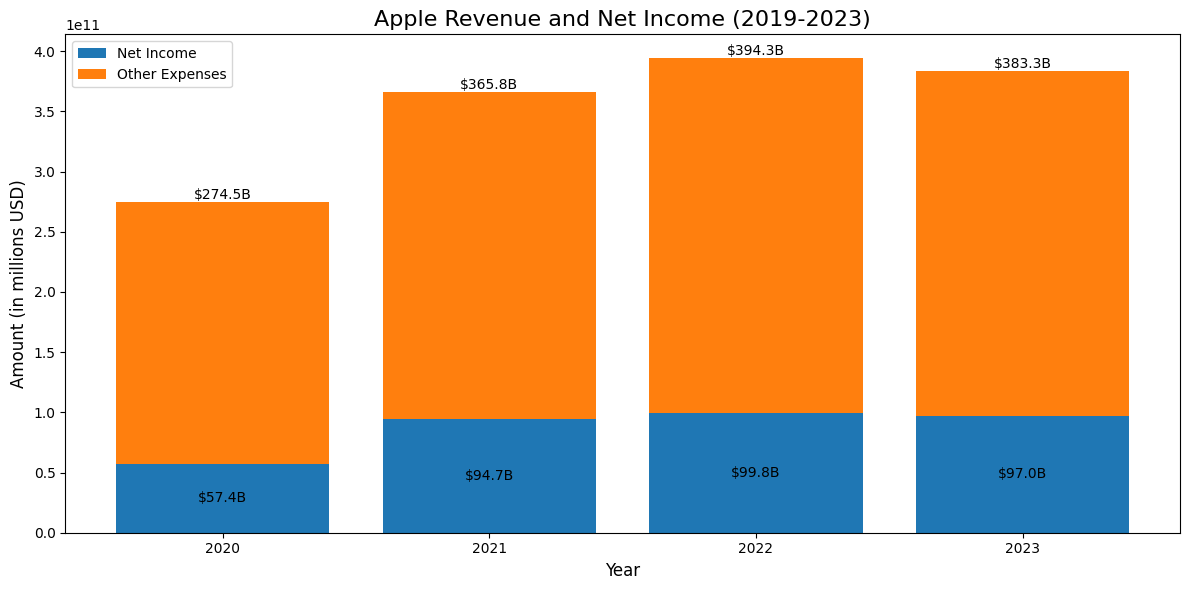

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract revenue and net income data
revenue = financials.loc['Total Revenue'][::-1]
net_income = financials.loc['Net Income'][::-1]
0
# Create years list (assuming the most recent year is 2023)
years = ['2020', '2021', '2022', '2023']

# Calculate the difference between revenue and net income
other_expenses = revenue - net_income

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(years, net_income, label='Net Income')
ax.bar(years, other_expenses,  bottom=net_income, label='Other Expenses')

# Customize the chart
ax.set_title('Apple Revenue and Net Income (2019-2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Amount (in millions USD)', fontsize=12)
ax.legend(loc='upper left')

# Add value labels on the bars
for i, (r, n) in enumerate(zip(revenue, net_income)):
    ax.text(i, r, f'${r/1e9:.1f}B', ha='center', va='bottom')
    ax.text(i, n/2, f'${n/1e9:.1f}B', ha='center', va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Fetch Apple's financial data
apple = yf.Ticker("AAPL")
income_stmt = apple.financials.T

# Select relevant columns for analysis
columns_of_interest = [
    'Total Revenue', 'Cost Of Revenue', 'Gross Profit',
    'Research And Development', 'Selling General And Administration',
    'Operating Income', 'EBITDA', 'EBIT', 'Interest Expense',
    'Net Income', 'Tax Provision', 'Pretax Income',
    'Other Income Expense', 'Diluted EPS', 'Basic EPS'
]

# Extract the most recent year's data
recent_year = income_stmt[columns_of_interest]
recent_year = recent_year.iloc[0]

labels = ['Total Revenue', 'Cost Of Revenue', 'Gross Profit', 'Operating Expenses',
          'Operating Income', 'Other Income/Expense', 'Pretax Income',
          'Tax Provision', 'Net Income']
color = [
    "rgba(31, 119, 180, 0.8)",
    "rgba(255, 127, 14, 0.8)",
    "rgba(44, 160, 44, 0.8)",
    "rgba(214, 39, 40, 0.8)",
    "rgba(148, 103, 189, 0.8)",
    "rgba(140, 86, 75, 0.8)",
    "rgba(227, 119, 194, 0.8)",
    "rgba(127, 127, 127, 0.8)",
    "rgba(188, 189, 34, 0.8)"
     ]

source = [0, 0, 2, 2, 4, 4, 6, 6]
target = [1, 2, 3, 4, 5, 6, 7, 8]

value = [
    recent_year['Total Revenue'],
    recent_year['Cost Of Revenue'],
    recent_year['Gross Profit'],
    recent_year['Research And Development'] + recent_year['Selling General And Administration'],
    recent_year['Operating Income'],
    recent_year['Other Income Expense'],
    recent_year['Pretax Income'] - recent_year['Operating Income'],
    recent_year['Tax Provision'],
    recent_year['Net Income']
    ]

fig = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = labels,
            color = ['red','green']
        ),
        link = dict(
            source = source,
            target = target,
            value = value,
            label = labels
        )
    )])

fig.update_layout(title_text="Apple Income Statement Flow (in billions USD)", font_size=10)
fig.show()

### ii) Balance Sheet

In [ ]:
df = pd.read_csv("balance_sheet_2024.csv")

df = df[df['Unnamed: 0']=='AAPL']
df = df[['Net Debt', 'Total Debt', 'Tangible Book Value', 'Cash And Cash Equivalents']]

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure()

fig.add_trace(go.Bar(
    y = df.iloc[0],
    x = ['Net Debt', 'Total Debt', 'Tangible Book Value', 'Cash And Cash Equivalents'],
    marker=dict(color='blue'),
))

fig.update_layout(
    title= f' Balance Sheet Key Metrics',
    xaxis_title='Metrics',
    yaxis_title='Amount (in billions)',
    template='plotly_white',
    xaxis=dict(tickangle=45),
    bargap=0.4,
)

fig.show()

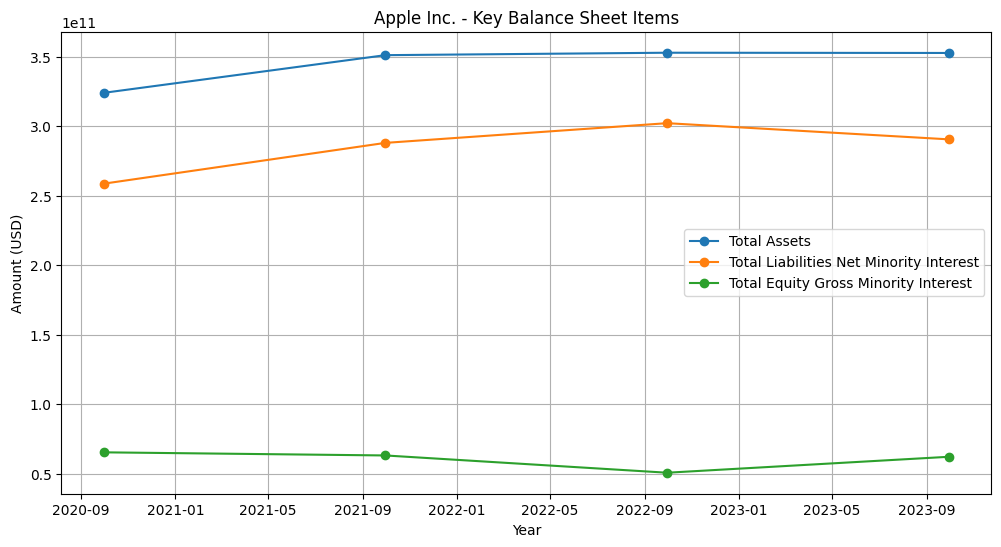

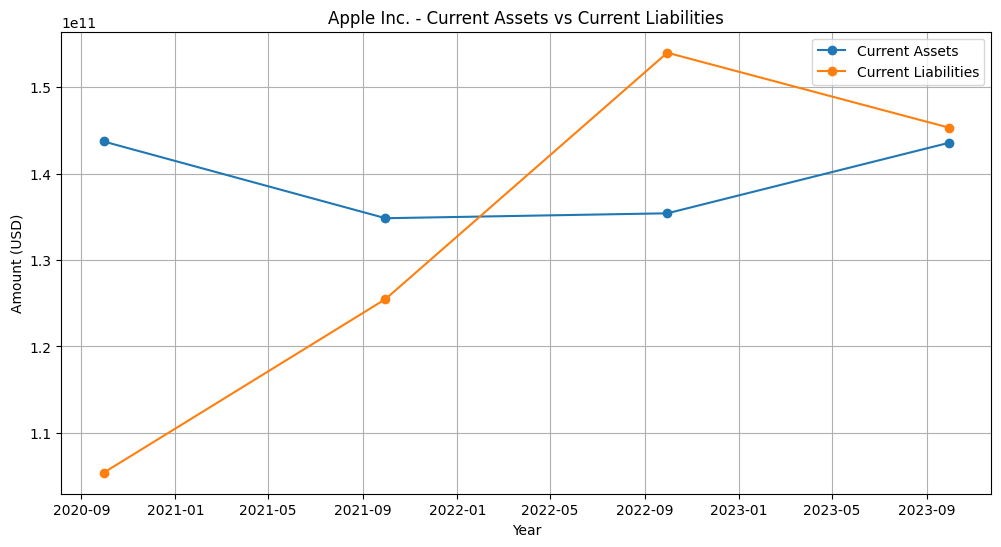

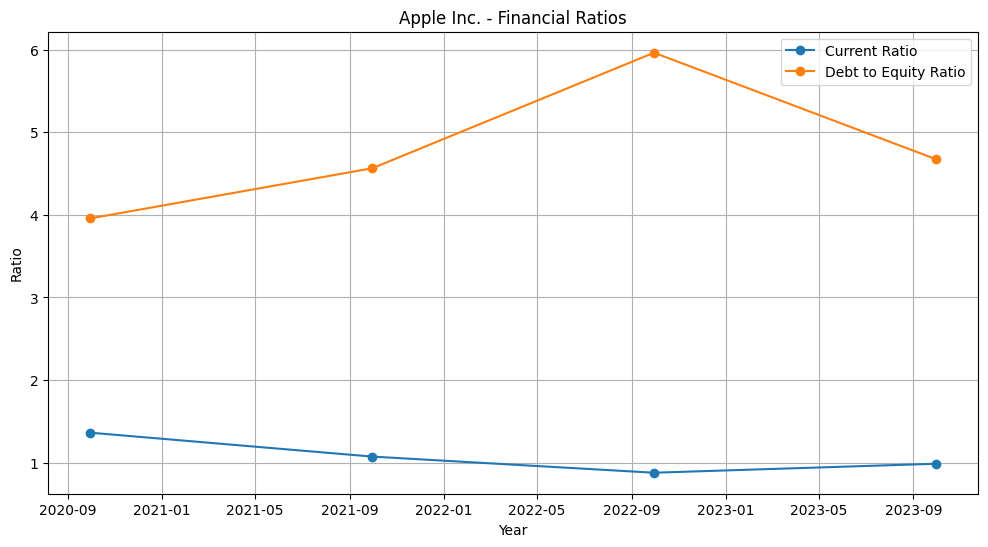

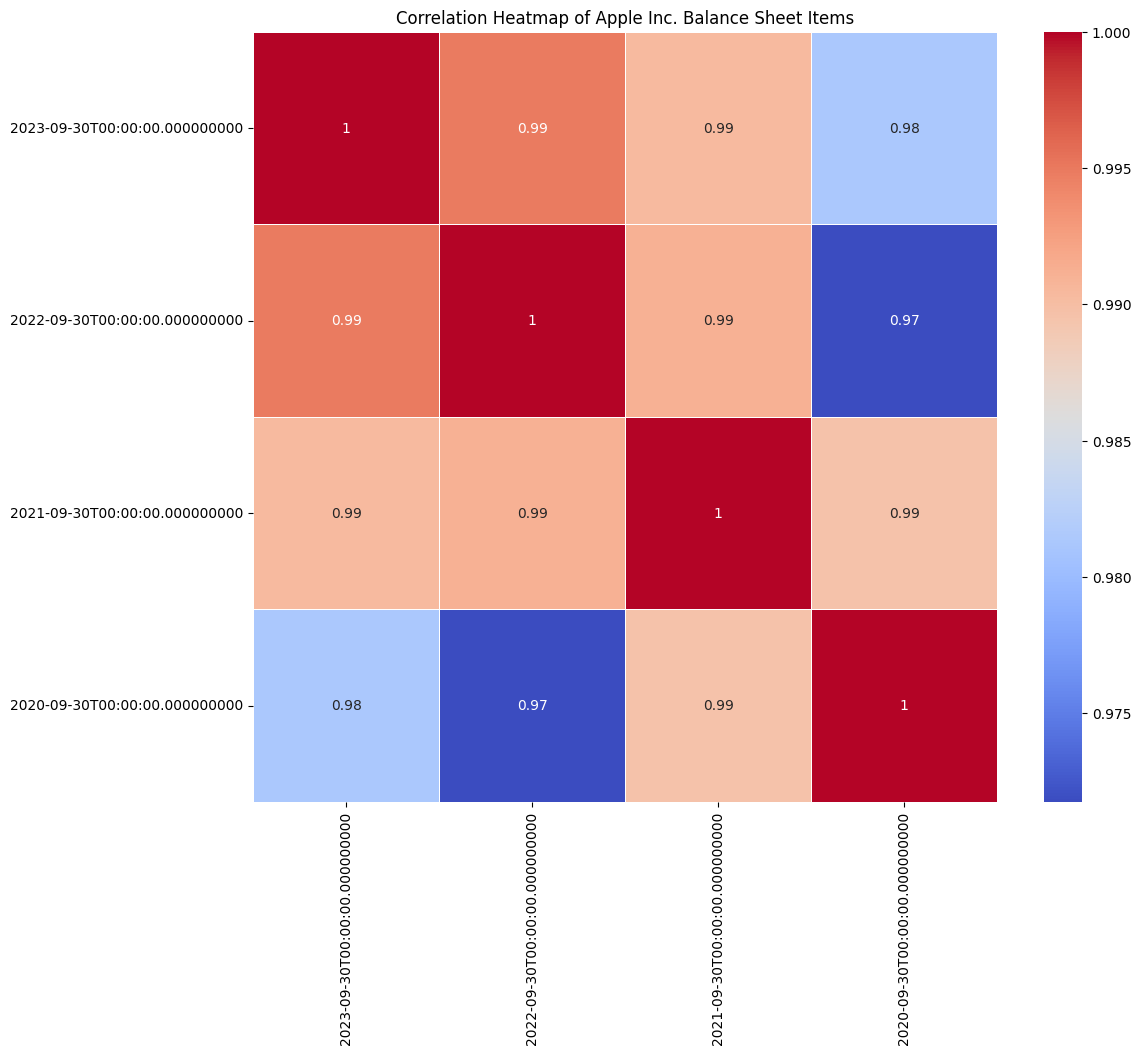

Apple Inc. - Most Recent Balance Sheet (% of Total Assets)
Total Assets                                        100.0
Total Liabilities Net Minority Interest         82.374079
Total Non Current Assets                        59.281644
Invested Capital                                49.132828
Total Capitalization                            44.649629
                                                  ...    
Working Capital                                 -0.494068
Other Equity Adjustments                         -3.24803
Gains Losses Not Affecting Retained Earnings     -3.24803
Accumulated Depreciation                       -20.104202
Other Investments                                     NaN
Name: 2023-09-30 00:00:00, Length: 68, dtype: object


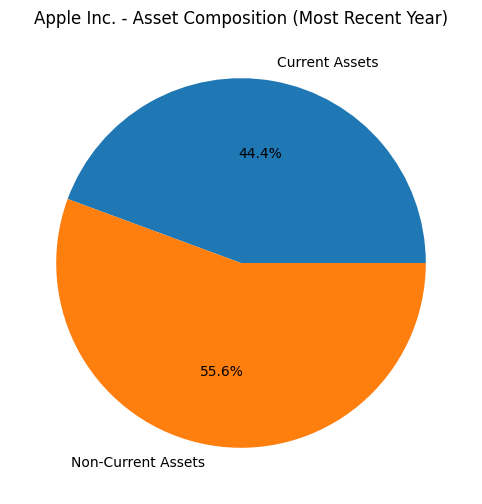

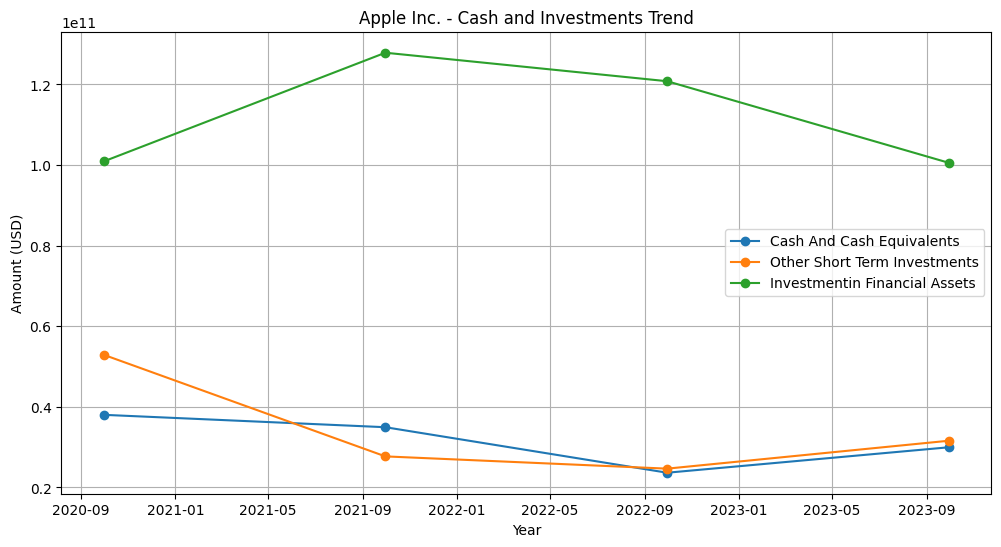

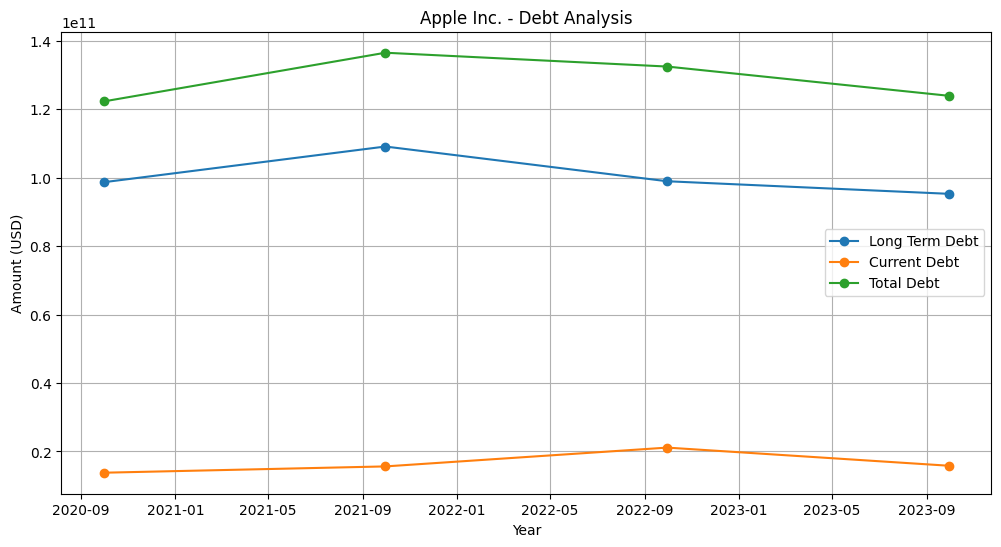

In [ ]:
# Transpose the dataframe for easier analysis
balance_sheet_t = balance_sheet.T

# Calculate some key financial ratios
balance_sheet_t['Current Ratio'] = balance_sheet_t['Current Assets'] / balance_sheet_t['Current Liabilities']
balance_sheet_t['Debt to Equity Ratio'] = balance_sheet_t['Total Liabilities Net Minority Interest'] / balance_sheet_t['Total Equity Gross Minority Interest']

# Create a function to plot balance sheet items
def plot_balance_sheet_items(items, title):
    plt.figure(figsize=(12, 6))
    for item in items:
        plt.plot(balance_sheet_t.index, balance_sheet_t[item], marker='o', label=item)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Amount (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot key balance sheet items
plot_balance_sheet_items(['Total Assets', 'Total Liabilities Net Minority Interest', 'Total Equity Gross Minority Interest'],
                         'Apple Inc. - Key Balance Sheet Items')

# Plot current assets and liabilities
plot_balance_sheet_items(['Current Assets', 'Current Liabilities'],
                         'Apple Inc. - Current Assets vs Current Liabilities')

# Plot financial ratios
plt.figure(figsize=(12, 6))
plt.plot(balance_sheet_t.index, balance_sheet_t['Current Ratio'], marker='o', label='Current Ratio')
plt.plot(balance_sheet_t.index, balance_sheet_t['Debt to Equity Ratio'], marker='o', label='Debt to Equity Ratio')
plt.title('Apple Inc. - Financial Ratios')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.show()


# Print the most recent balance sheet with percentages
recent_balance_sheet = balance_sheet.iloc[:, 0]
total_assets = recent_balance_sheet['Total Assets']
balance_sheet_percentages = (recent_balance_sheet / total_assets * 100).round(2)
balance_sheet_percentages = balance_sheet_percentages.sort_values(ascending=False)

print("Apple Inc. - Most Recent Balance Sheet (% of Total Assets)")
print(balance_sheet_percentages)

# Additional analysis: Asset composition
plt.figure(figsize=(12, 6))
plt.pie([balance_sheet_t['Current Assets'].iloc[-1],
         balance_sheet_t['Total Non Current Assets'].iloc[-1]],
        labels=['Current Assets', 'Non-Current Assets'],
        autopct='%1.1f%%')
plt.title('Apple Inc. - Asset Composition (Most Recent Year)')
plt.show()

# Trend of Cash and Investments
plot_balance_sheet_items(['Cash And Cash Equivalents', 'Other Short Term Investments', 'Investmentin Financial Assets'],
                         'Apple Inc. - Cash and Investments Trend')

# Debt Analysis
plot_balance_sheet_items(['Long Term Debt', 'Current Debt', 'Total Debt'],
                         'Apple Inc. - Debt Analysis')

### iii) Cash Flow Statement

In [ ]:
cash_flow = apple.cash_flow
cash_flow.index

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Net Long Term Debt Issuance', 'Long Term Debt Payments',
       'Long Term Debt Issuance', 'Investing Cash Flow',
       'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purch

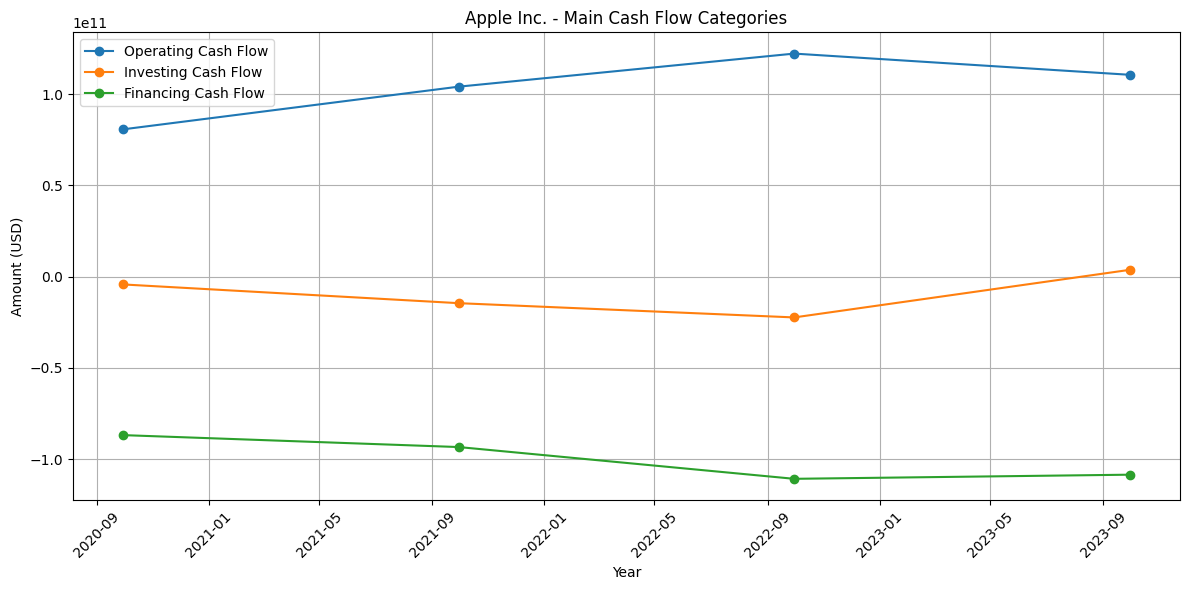

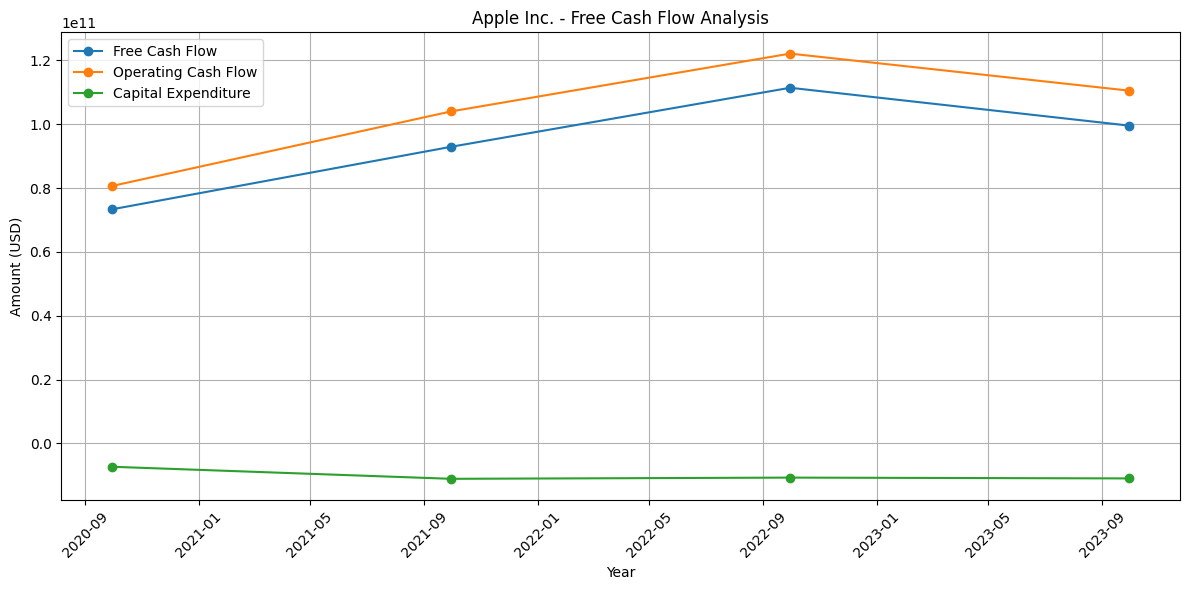

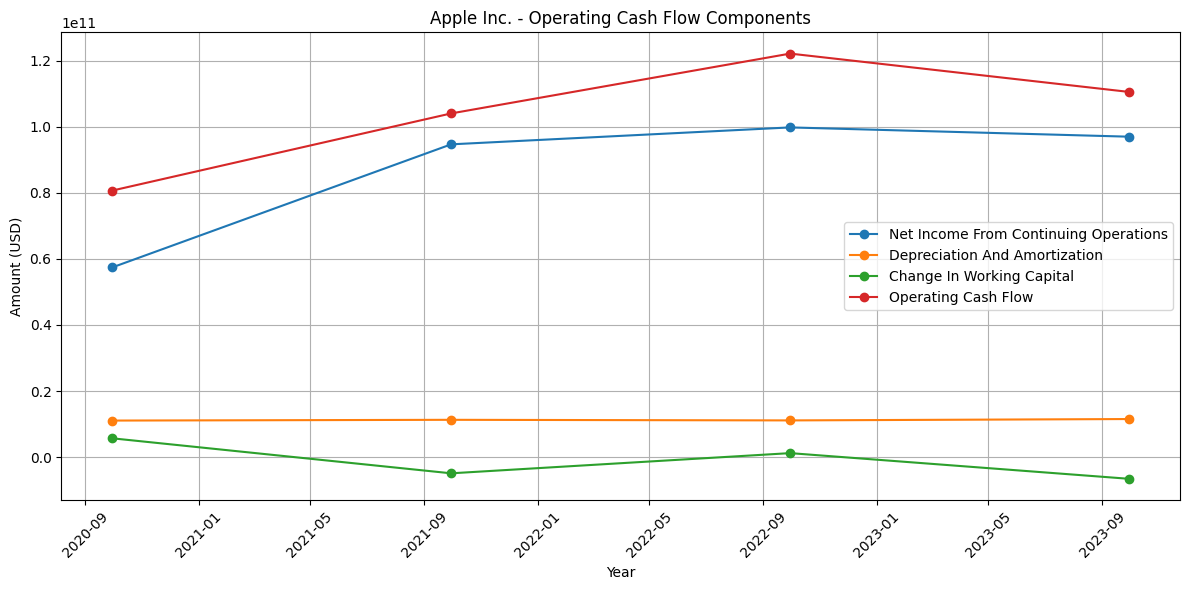

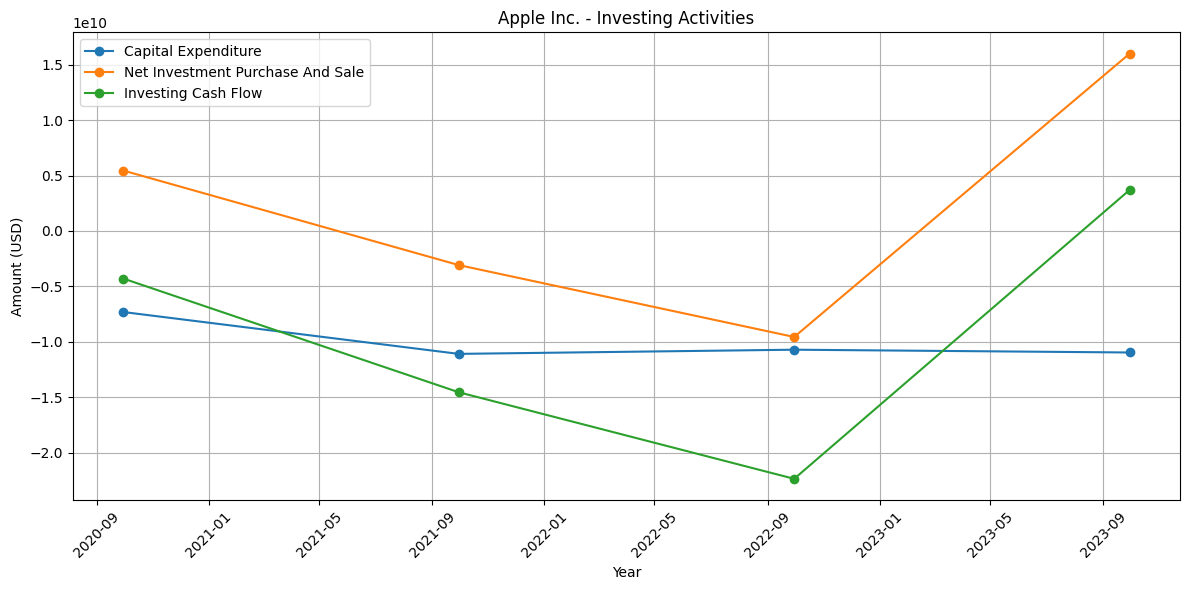

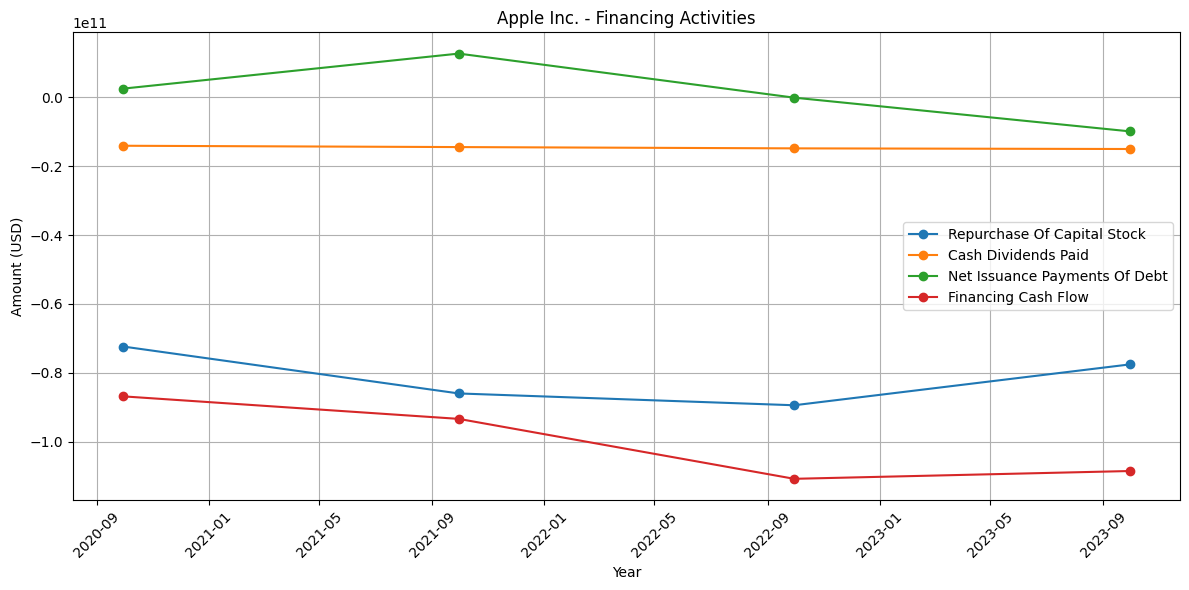

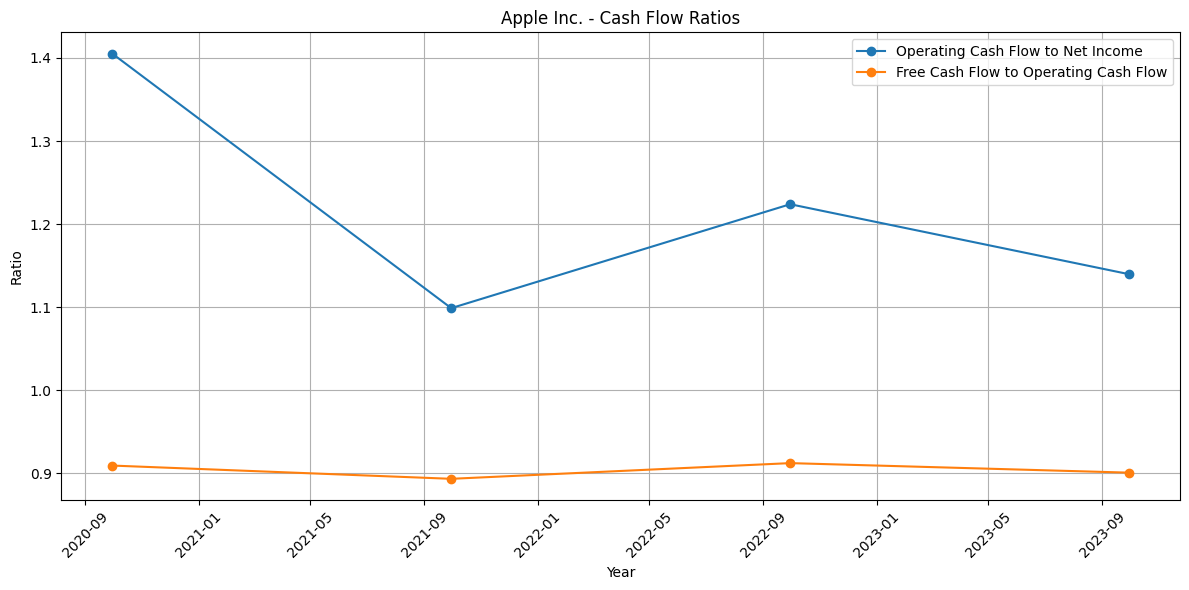

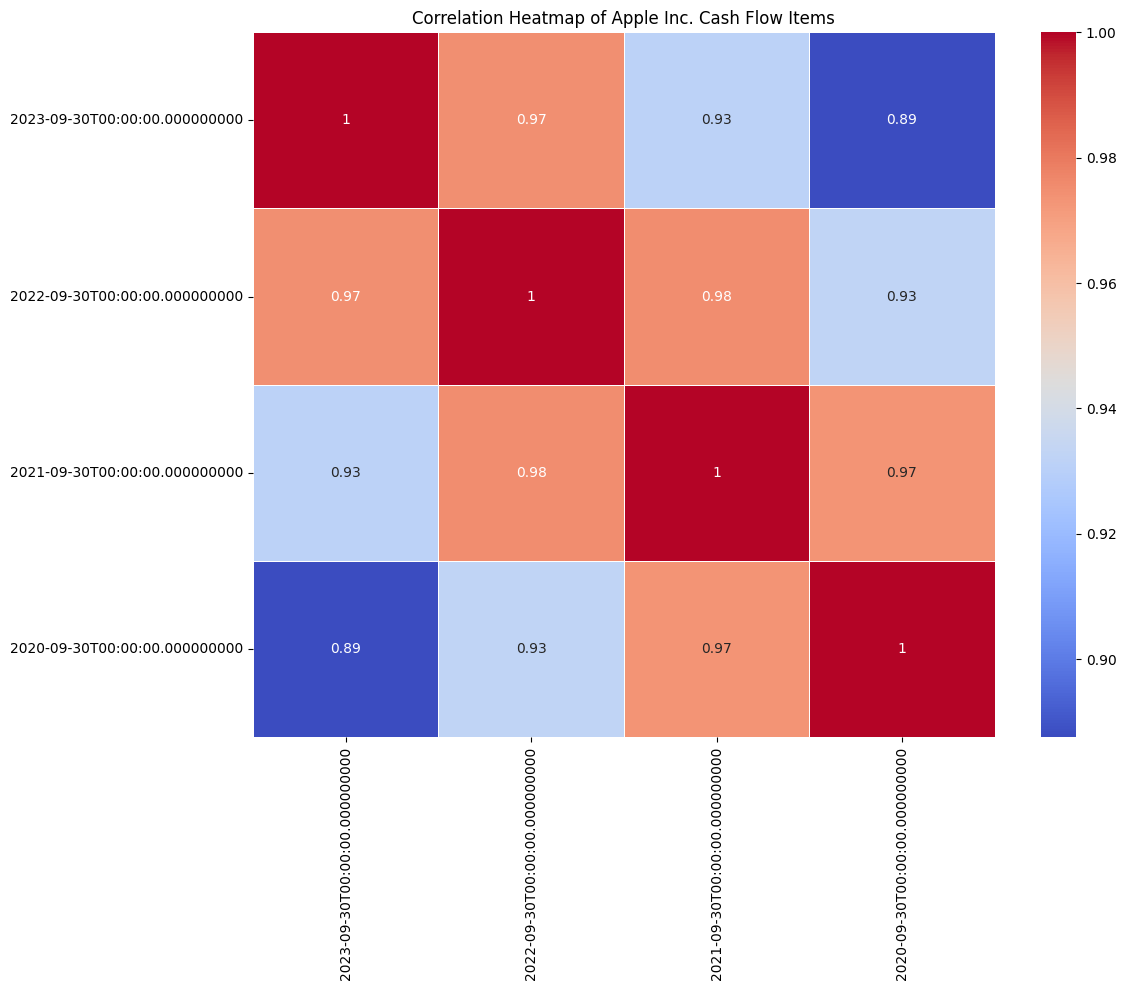

Apple Inc. - Most Recent Cash Flow Statement (% of Operating Cash Flow)
Operating Cash Flow                                   100.0
Cash Flow From Continuing Operating Activities        100.0
Free Cash Flow                                    90.086211
Net Income From Continuing Operations             87.744136
Sale Of Investment                                41.173118
End Cash Position                                 27.805469
Beginning Cash Position                           22.594827
Income Tax Paid Supplemental Data                 16.897497
Net Investment Purchase And Sale                   14.47491
Depreciation And Amortization                     10.420379
Depreciation Amortization Depletion               10.420379
Stock Based Compensation                           9.799806
Changes In Cash                                    5.210642
Long Term Debt Issuance                            4.729381
Issuance Of Debt                                   4.729381
Interest Paid Supplemental D

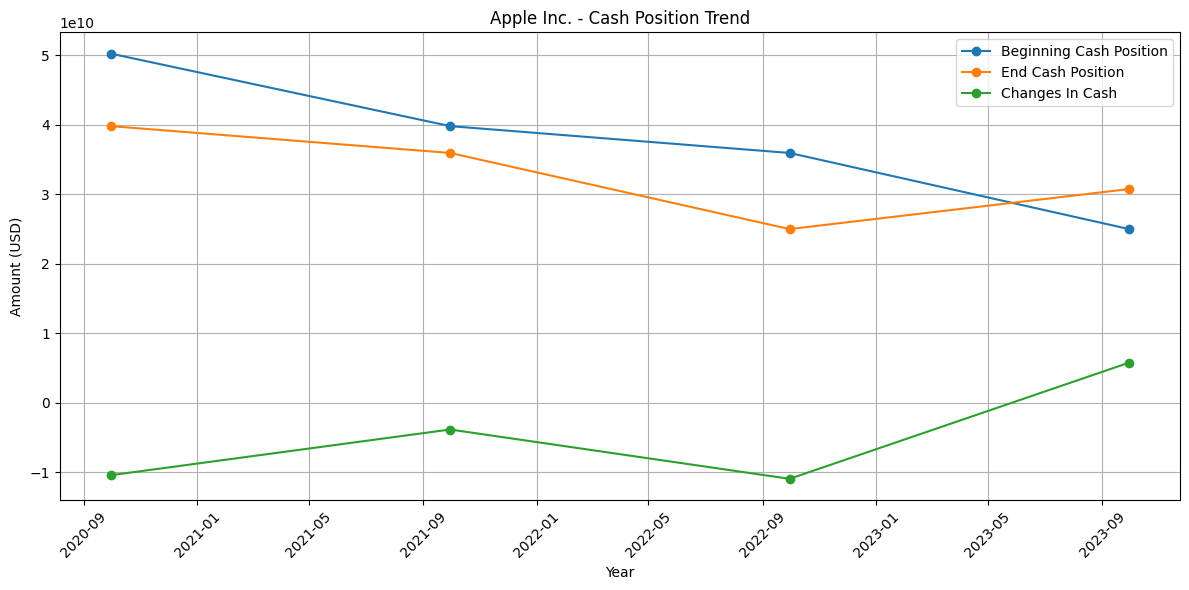

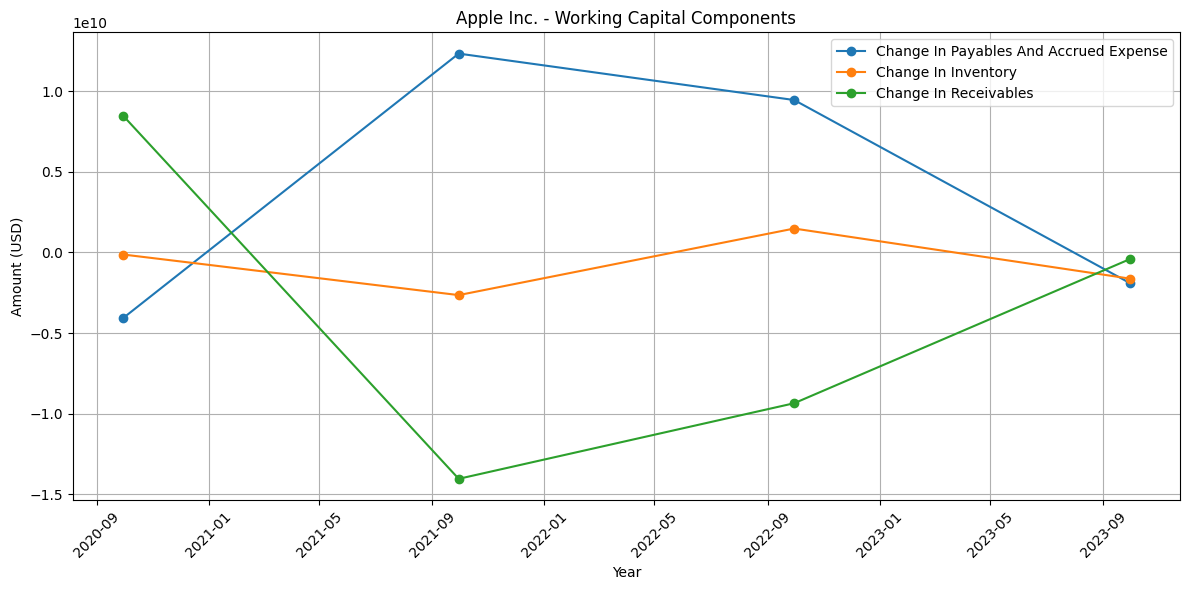

In [ ]:
# Transpose the dataframe for easier analysis
cash_flow_t = cash_flow.T

# Function to plot cash flow items
def plot_cash_flow_items(items, title):
    plt.figure(figsize=(12, 6))
    for item in items:
        plt.plot(cash_flow_t.index, cash_flow_t[item], marker='o', label=item)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Amount (USD)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot main cash flow categories
plot_cash_flow_items(['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow'],
                     'Apple Inc. - Main Cash Flow Categories')

# Plot Free Cash Flow
plot_cash_flow_items(['Free Cash Flow', 'Operating Cash Flow', 'Capital Expenditure'],
                     'Apple Inc. - Free Cash Flow Analysis')

# Analyze cash from operations
operating_cash_items = ['Net Income From Continuing Operations', 'Depreciation And Amortization', 'Change In Working Capital', 'Operating Cash Flow']
plot_cash_flow_items(operating_cash_items, 'Apple Inc. - Operating Cash Flow Components')

# Analyze investing activities
investing_items = ['Capital Expenditure', 'Net Investment Purchase And Sale', 'Investing Cash Flow']
plot_cash_flow_items(investing_items, 'Apple Inc. - Investing Activities')

# Analyze financing activities
financing_items = ['Repurchase Of Capital Stock', 'Cash Dividends Paid', 'Net Issuance Payments Of Debt', 'Financing Cash Flow']
plot_cash_flow_items(financing_items, 'Apple Inc. - Financing Activities')

# Calculate and plot cash flow ratios
cash_flow_t['Operating Cash Flow to Net Income Ratio'] = cash_flow_t['Operating Cash Flow'] / cash_flow_t['Net Income From Continuing Operations']
cash_flow_t['Free Cash Flow to Operating Cash Flow Ratio'] = cash_flow_t['Free Cash Flow'] / cash_flow_t['Operating Cash Flow']

plt.figure(figsize=(12, 6))
plt.plot(cash_flow_t.index, cash_flow_t['Operating Cash Flow to Net Income Ratio'], marker='o', label='Operating Cash Flow to Net Income')
plt.plot(cash_flow_t.index, cash_flow_t['Free Cash Flow to Operating Cash Flow Ratio'], marker='o', label='Free Cash Flow to Operating Cash Flow')
plt.title('Apple Inc. - Cash Flow Ratios')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of correlation between cash flow items
correlation = cash_flow.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Apple Inc. Cash Flow Items')
plt.tight_layout()
plt.show()

# Print the most recent cash flow statement with percentages of operating cash flow
recent_cash_flow = cash_flow.iloc[:, 0]
operating_cash_flow = recent_cash_flow['Operating Cash Flow']
cash_flow_percentages = (recent_cash_flow / operating_cash_flow * 100).round(2)
cash_flow_percentages = cash_flow_percentages.sort_values(ascending=False)

print("Apple Inc. - Most Recent Cash Flow Statement (% of Operating Cash Flow)")
print(cash_flow_percentages)

# Additional analysis: Cash position trend
plot_cash_flow_items(['Beginning Cash Position', 'End Cash Position', 'Changes In Cash'],
                     'Apple Inc. - Cash Position Trend')

# Working Capital Components
working_capital_items = ['Change In Payables And Accrued Expense', 'Change In Inventory', 'Change In Receivables']
plot_cash_flow_items(working_capital_items, 'Apple Inc. - Working Capital Components')

## 5) Technical Analysis

### i) Candlestick Chart



<b>Introduction to Candlestick Charts</b>

A **candlestick chart** is a popular financial chart used to represent the price movements of an asset over a specific time period. Each "candlestick" provides information about the open, high, low, and close prices for that period.

<b>Key Components of a Candlestick</b>

- **Open**: The price at which the asset starts trading during the time period.
- **Close**: The price at which the asset finishes trading during the time period.
- **High**: The highest price reached during the time period.
- **Low**: The lowest price reached during the time period.

<b>Example of a Candlestick Chart</b>

<img src="https://www.incrediblecharts.com/images/candlesticks/candlestick-colors.svg" alt="Example Candlestick Chart" width="300"/>

In [ ]:
# Calculate moving averages for a specific stock, e.g., 'AAPL'
df = pd.read_csv('all_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# We'll calculate 20-day and 50-day moving averages
apple_data = df[df['Ticker'] == 'AAPL'].copy()
apple_data.set_index('Date', inplace=True)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=apple_data.index,
    open=apple_data['Open'],
    high=apple_data['High'],
    low=apple_data['Low'],
    close=apple_data['Close']
)])

# Customize the layout
fig.update_layout(
    title='AAPL Stock Price',
    yaxis_title='Price (USD)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False
)

# Display the chart
fig.show()

<ipython-input-14-996e50da7cce>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


### ii) SMA & EMA

<b>Simple Moving Average (SMA)</b>

The Simple Moving Average (SMA) is calculated by taking the arithmetic mean of a given set of values over a specified period. For a series of closing prices, the formula is:

$$SMA = \frac{\sum_{i=1}^{n} P_i}{n}$$

Where:
- $P_i$ : is the price of an asset at period $i$
- $n$ : is the number of periods

<b>Exponential Moving Average (EMA)</b>

The Exponential Moving Average (EMA) gives more weight to recent prices. The formula for EMA is:

$$EMA_t = \alpha \times P_t + (1 - \alpha) \times EMA_{t-1}$$

Where:
- $EMA_t$ is the EMA value at time $t$
- $P_t$ is the price at time $t$
- $\alpha$ is the smoothing factor, calculated as $\frac{2}{n+1}$
- $n$ is the number of periods

For the initial EMA calculation, you can use the SMA of the first $n$ periods as the starting point.

<ipython-input-15-f93dbbed8a2f>:3: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



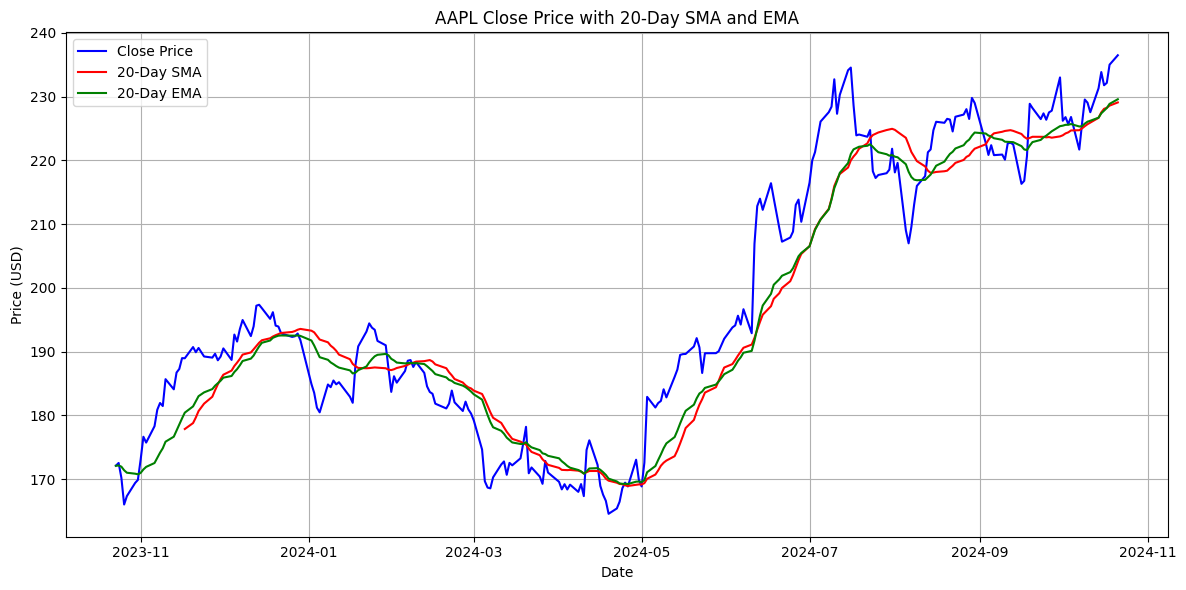

In [ ]:
# Load the data
df = pd.read_csv('all_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for AAPL
apple_data = df[df['Ticker'] == 'AAPL'].copy()
apple_data.set_index('Date', inplace=True)

# Calculate Simple Moving Average (SMA)
apple_data['SMA_20'] = apple_data['Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
apple_data['EMA_20'] = apple_data['Close'].ewm(span=20, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(apple_data.index, apple_data['Close'], label='Close Price', color='blue')
plt.plot(apple_data.index, apple_data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(apple_data.index, apple_data['EMA_20'], label='20-Day EMA', color='green')

plt.title('AAPL Close Price with 20-Day SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### iii) RSI chart

<b>Creating an RSI Chart: A Step-by-Step Guide</b>

The Relative Strength Index (RSI) is a popular momentum oscillator used in technical analysis.

<b>Basic RSI Formula</b>

The RSI is calculated using the following formula:

$RSI = 100 - \frac{100}{1 + RS}$

Where:
$RS = \frac{\text{Average Gain}}{\text{Average Loss}}$

<b>Detailed Calculation Steps</b>

1. **Calculate Average Gain and Average Loss**:
   For the first 14 periods:
   $\text{First Average Gain} = \frac{\text{Sum of Gains over the past 14 periods}}{14}$
   $\text{First Average Loss} = \frac{\text{Sum of Losses over the past 14 periods}}{14}$

2. **Subsequent Calculations**:
   For the 15th period onward:
  $\text{Average Gain} = \frac{(\text{Previous Average Gain} \times 13 + \text{Current Gain})}{14}$
   $\text{Average Loss} = \frac{(\text{Previous Average Loss} \times 13 + \text{Current Loss})}{14}$

3. **Calculate RS**:
   $RS = \frac{\text{Average Gain}}{\text{Average Loss}}$

4. **Calculate RSI**:
   $RSI = 100 - \frac{100}{1 + RS}$

<b>Interpreting RSI</b>

- **RSI > 70**: Generally considered overbought
- **RSI < 30**: Generally considered oversold
- **RSI = 50**: Neutral


<ipython-input-16-535c9df8c4da>:3: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



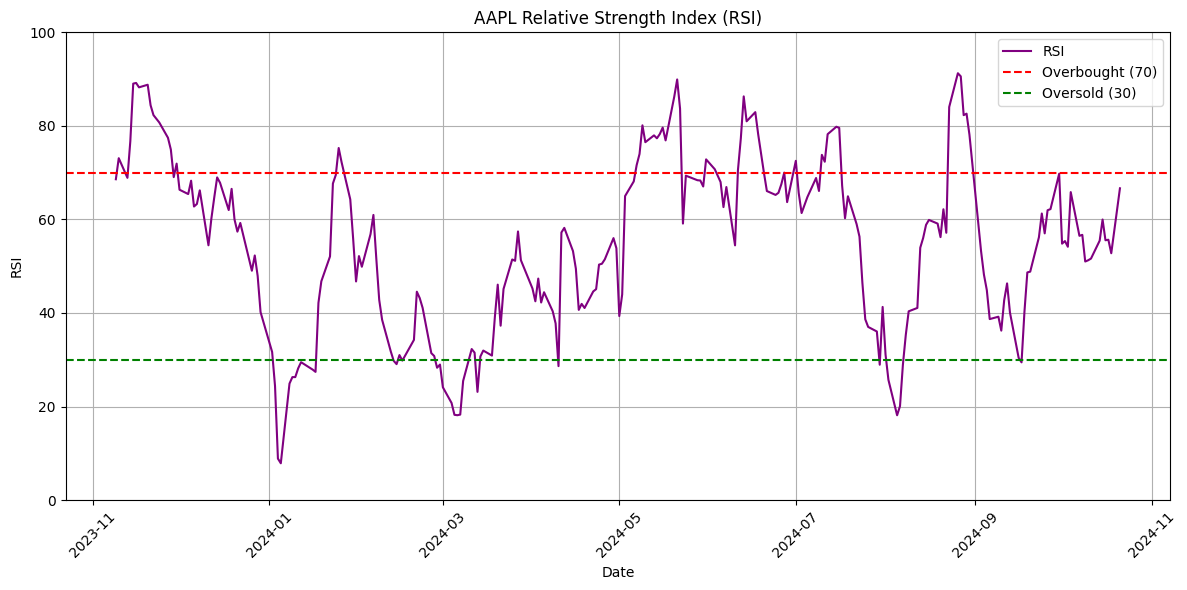

In [ ]:
# Load the data
df = pd.read_csv('all_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for AAPL
apple_data = df[df['Ticker'] == 'AAPL'].copy()
apple_data.set_index('Date', inplace=True)


# Calculate Relative Strength Index (RSI)
delta = apple_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
apple_data['RSI'] = 100 - (100 / (1 + rs))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot RSI
ax.plot(apple_data.index, apple_data['RSI'], label='RSI', color='purple')
ax.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Customize the plot
ax.set_title('AAPL Relative Strength Index (RSI)')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()
ax.grid(True)

# Set y-axis limits
ax.set_ylim(0, 100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### iv) MACD Chart

<b>How to Calculate and Interpret the MACD Chart</b>

The Moving Average Convergence Divergence (MACD) is a popular technical indicator used to identify trend direction and momentum. This tutorial will guide you through calculating and interpreting the MACD chart.


<b>Calculating MACD</b>

The MACD consists of three components:

1. **MACD Line**: The difference between two exponential moving averages (EMAs)
2. **Signal Line**: An EMA of the MACD Line
3. **MACD Histogram**: The difference between the MACD Line and Signal Line


<b>Formula</u>

$MACD Line =   EMA_{12period} -  EMA_{26period}$

$Signal Line = EMA_{9-period} of MACD Line$

$MACD Histogram = MACD Line - Signal Line$

$EMA = (Close - EMA_{previous}) \times Multiplier + EMA_{previous}$


Where:
- Multiplier = $2 / (number of periods + 1)$
- For 12-period EMA: $Multiplier = 2 / (12 + 1) = 0.1538
- For 26-period EMA: Multiplier = 2 / (26 + 1) = 0.0741

<b>Interpretation</b>

- **MACD Line > 0**: Short-term momentum is bullish
- **MACD Line < 0**: Short-term momentum is bearish
- **MACD Line crosses above Signal Line**: Potential buy signal
- **MACD Line crosses below Signal Line**: Potential sell signal
- **Divergence between MACD and price**: Possible trend reversal

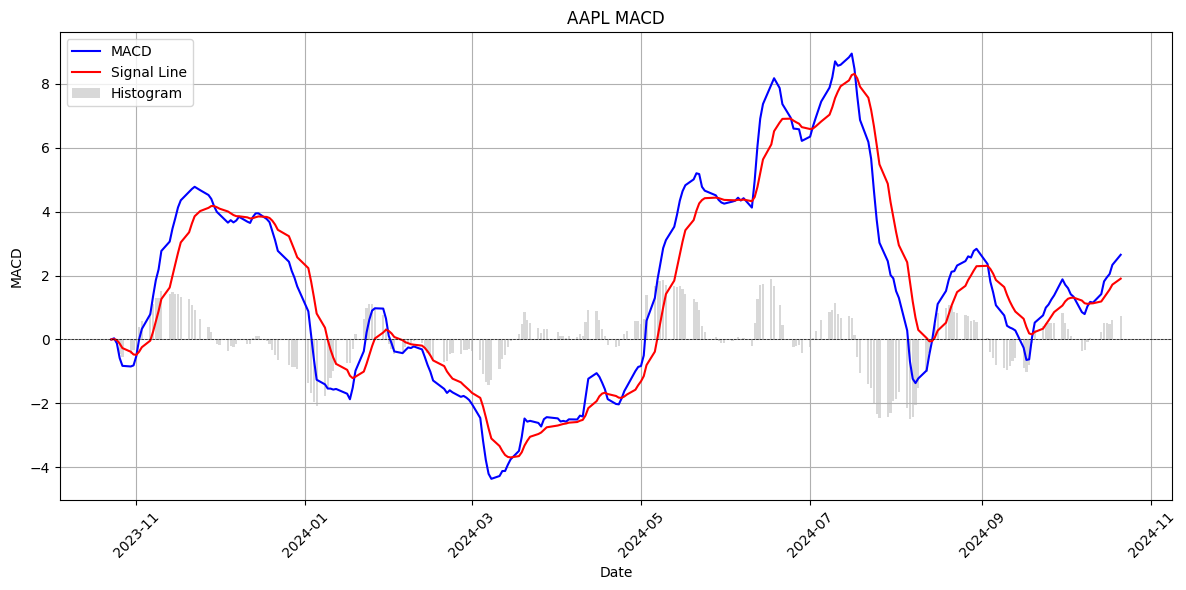

In [ ]:
# Calculate MACD components
fast_ema = apple_data['Close'].ewm(span=12, adjust=False).mean()
slow_ema = apple_data['Close'].ewm(span=26, adjust=False).mean()
apple_data['MACD'] = fast_ema - slow_ema
apple_data['Signal'] = apple_data['MACD'].ewm(span=9, adjust=False).mean()
apple_data['Histogram'] = apple_data['MACD'] - apple_data['Signal']

# Create the MACD plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot MACD line
ax.plot(apple_data.index, apple_data['MACD'], label='MACD', color='blue')

# Plot Signal line
ax.plot(apple_data.index, apple_data['Signal'], label='Signal Line', color='red')

# Plot Histogram
ax.bar(apple_data.index, apple_data['Histogram'], label='Histogram', color='gray', alpha=0.3)

# Customize the plot
ax.set_title('AAPL MACD')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
ax.legend(loc='upper left')
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

### v) Boilinger Chart

<b>How to Calculate and Interpret Bollinger Bands</b>

Bollinger Bands are a popular technical analysis tool that helps traders identify potential overbought and oversold conditions, as well as measure market volatility. This tutorial will guide you through calculating and interpreting Bollinger Bands.


<b>Calculating Bollinger Bands</b>

Bollinger Bands consist of three lines:

1. Middle Band: A simple moving average (SMA)
2. Upper Band: Middle Band + (Standard Deviation × 2)
3. Lower Band: Middle Band - (Standard Deviation × 2)


<b>Formula</b>
The Middle Band is a simple moving average (SMA), typically using a 20-day period:

$MB = SMA(TP, n)$

Where:
- TP = Typical Price = (High + Low + Close) / 3
- n = Number of days (usually 20)

<b>Upper and Lower Bands</b>

The Upper and Lower Bands are calculated as follows:

$UB = MB + (m × σ)$
$LB = MB - (m × σ)$

Where:
- m = Number of standard deviations (usually 2)
- σ = Standard deviation of TP over the same n periods as the SMA


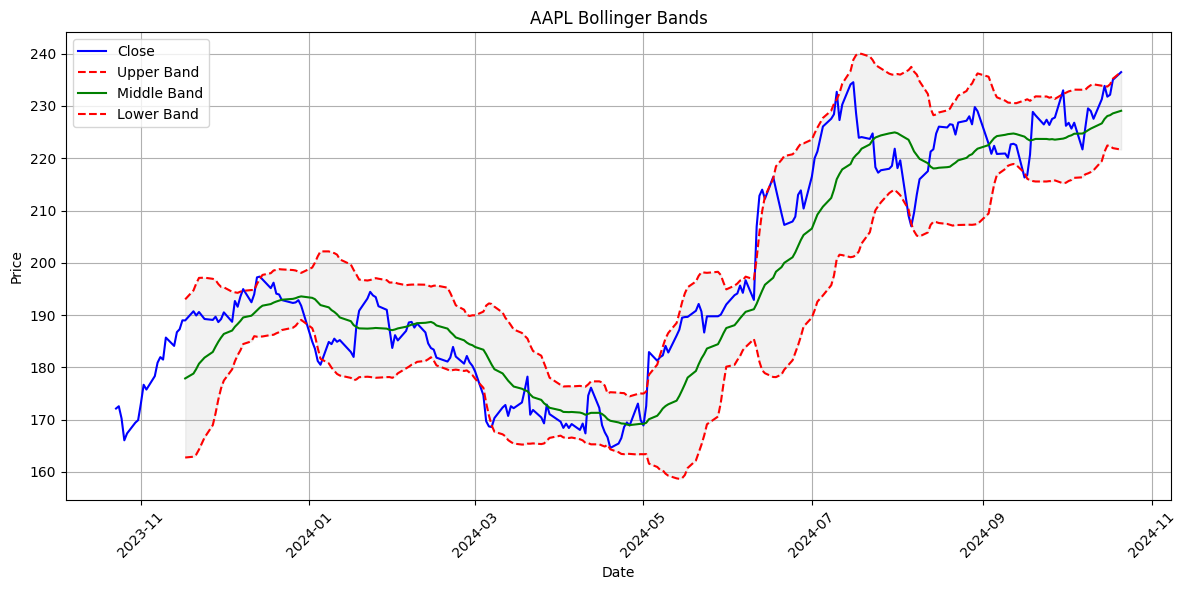

In [ ]:
# Calculate Bollinger Bands
window = 20
apple_data['Middle_Band'] = apple_data['Close'].rolling(window=window).mean()
std_dev = apple_data['Close'].rolling(window=window).std()
apple_data['Upper_Band'] = apple_data['Middle_Band'] + (std_dev * 2)
apple_data['Lower_Band'] = apple_data['Middle_Band'] - (std_dev * 2)

# Create the Bollinger Bands plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Close price
ax.plot(apple_data.index, apple_data['Close'], label='Close', color='blue')

# Plot Bollinger Bands
ax.plot(apple_data.index, apple_data['Upper_Band'], label='Upper Band', color='red', linestyle='--')
ax.plot(apple_data.index, apple_data['Middle_Band'], label='Middle Band', color='green', linestyle='-')
ax.plot(apple_data.index, apple_data['Lower_Band'], label='Lower Band', color='red', linestyle='--')

# Fill the area between the upper and lower bands
ax.fill_between(apple_data.index, apple_data['Lower_Band'], apple_data['Upper_Band'], color='gray', alpha=0.1)

# Customize the plot
ax.set_title('AAPL Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### vi) AAPL Technical Analysis

Momentum and Trend Analysis

- **Positive Momentum**: AAPL has gained **2.24%** over the last 5 trading days, indicating strong short-term buying pressure.
- **Price Position**: The stock price ($236.48) is trading above its **20-day Simple Moving Average (SMA)** of **$229.08**, signaling a bullish trend.
- **MACD Indicator**: The MACD is at **2.6493**, above its signal line of **1.9021**, suggesting continued positive momentum.

Overbought/Oversold Conditions

- **RSI**: Currently at **66.66**, approaching but not yet in overbought territory (70).
- **Bollinger Bands**: AAPL is trading at **99.76%** of its Bollinger Band range, very close to the upper band, indicating potential overextension.

Price Volatility and Support/Resistance

- **Current Price**: $236.48, near the upper Bollinger Band ($236.52).
- **Support Level**: The lower Bollinger Band is at **$221.65**, providing potential support.
  
Possible Scenarios
1. **Continued Momentum**: If bullish sentiment persists, the stock could continue to rise along the upper band.
2. **Potential Pullback**: Given its extended position, a short-term pullback or consolidation towards the middle Bollinger Band is possible.

Volume Analysis

- **Volume Status**: Current volume is at **90.8%** of the 20-day average, slightly below average during price increases, indicating some caution among traders.

Trading Implications

For Current Holders
- The strong uptrend and positive MACD support holding existing positions.
- Consider setting trailing stops due to the extended nature of the move.

For Potential Buyers
- Entering at current levels carries risk; waiting for a pullback to a support level or consolidation may be prudent.

Short-Term Trading
- Day traders and swing traders should be cautious of potential short-term reversals given the stock's extended position.

ong-Term Outlook
- The overall trend remains positive; dollar-cost averaging into positions rather than making large single entries may be a prudent approach at current levels.

---

*Note: While technical analysis provides valuable insights, it should be combined with fundamental analysis and broader market trends when making investment decisions.*

## 6) Forecast

### Package install

In [ ]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00


### i) Check stationary

In [ ]:
# Load the data
df = pd.read_csv('all_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# We'll calculate 20-day and 50-day moving averages
apple_data = df[df['Ticker'] == 'AAPL'].copy()
apple_data.set_index('Date', inplace=True)

np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
y = np.sin(np.arange(len(dates)) * 2 * np.pi / 365) + np.random.normal(0, 0.1, len(dates))
df = pd.DataFrame({'date': dates, 'value': y})
df.set_index('date', inplace=True)

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

# Check stationarity
check_stationarity(df['value'])

ADF Statistic: -3.6682234894285743
p-value: 0.004582981549475072
Critical Values: {'1%': -3.436459052172655, '5%': -2.864237372528562, '10%': -2.568206176974609}
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


### ii) Arima Model

<ipython-input-6-e5ded6e2d28f>:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


Finding the best ARIMA model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2333083.403, Time=5.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2333081.351, Time=6.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2333081.276, Time=13.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2333081.403, Time=3.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2333083.315, Time=20.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2333063.363, Time=23.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2333042.494, Time=148.81 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2333038.755, Time=36.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2333064.732, Time=32.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2332996.482, Time=35.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2333000.838, Time=28.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2332989.700, Time=255.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2333000.818, Time=35.60 sec
 ARIMA(3,1,3)(0,

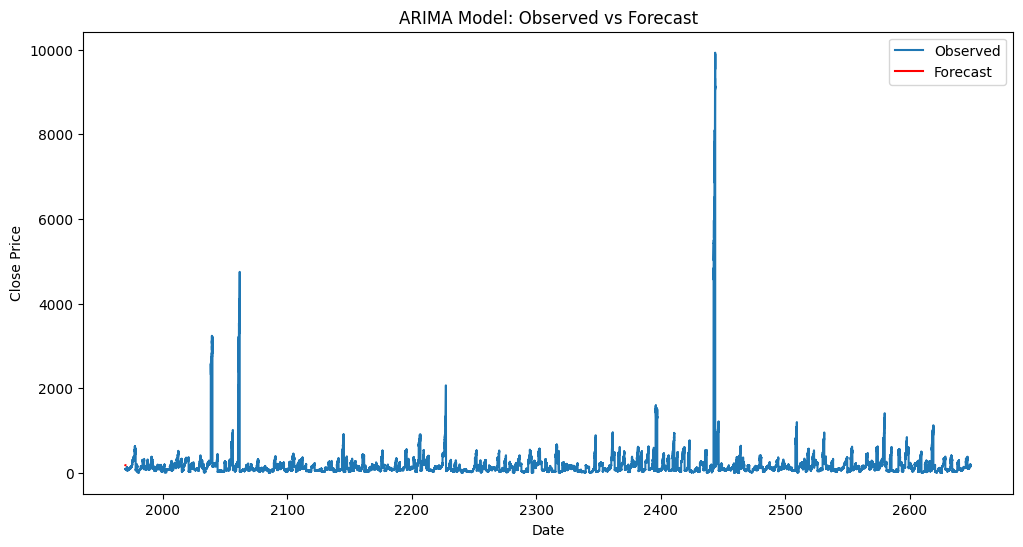

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load the data
df = pd.read_csv('all_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Automatically find the best ARIMA model
print("Finding the best ARIMA model...")
auto_model = auto_arima(df['Close'], start_p=0, start_q=0, max_p=3, max_q=3, m=1,
                        start_P=0, seasonal=False, d=1, D=1, trace=True,
                        error_action='ignore', suppress_warnings=True, stepwise=True)

print("\nBest ARIMA Model:")
print(auto_model.summary())

# Fit the ARIMA model
model = ARIMA(df['Close'], order=auto_model.order)
results = model.fit()

# Print model summary
print("\nARIMA Model Summary:")
print(results.summary())

# Make predictions
forecast_horizon = 5
forecast = results.forecast(steps=forecast_horizon)

print("\nForecast for the next", forecast_horizon, "periods:")
print(forecast)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Observed')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_horizon+1, freq='D')[1:],
         forecast, color='red', label='Forecast')
plt.title('ARIMA Model: Observed vs Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### ii) GARCH model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.0 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003103. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10033.4
Distribution:                  Normal   AIC:                          -20058.8
Method:            Maximum Likelihood   BIC:                          -20033.9
                                        No. Observations:                 3732
Date:                Fri, Nov 15 2024   Df Residuals:                     3731
Time:                        05:36:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6481e-03  2.615e-04      6.303  2.916e-10 [1.

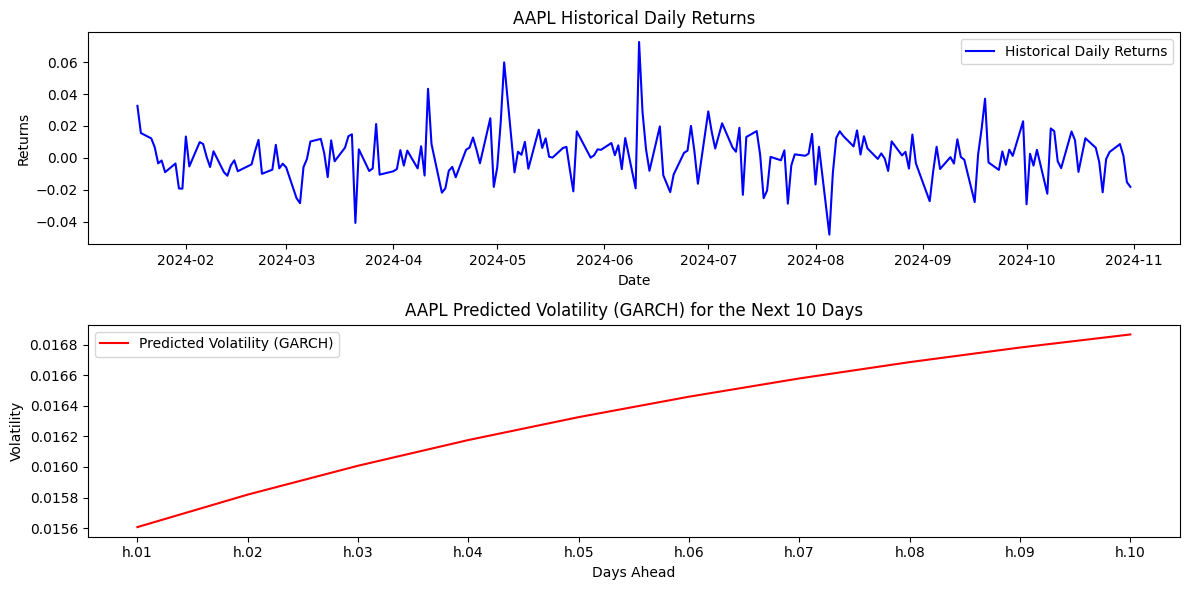

Predicted mean returns for the next 10 days:
                               h.01      h.02      h.03      h.04      h.05  \
Date                                                                          
2024-10-31 00:00:00+00:00  0.001648  0.001648  0.001648  0.001648  0.001648   

                               h.06      h.07      h.08      h.09      h.10  
Date                                                                         
2024-10-31 00:00:00+00:00  0.001648  0.001648  0.001648  0.001648  0.001648  


In [ ]:
!pip install arch
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Step 1: Download historical Apple stock data
symbol = 'AAPL'
data = yf.download(symbol, start='2010-01-01', end='2024-11-01')

# Step 2: Calculate daily returns (percentage change)
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Step 3: Fit GARCH(1,1) model
returns = data['Returns'].dropna()
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp="off")

# Step 4: Print model summary
print(model_fit.summary())

# Step 5: Predict future volatility (conditional standard deviation)
forecast_horizon = 10  # forecast for the next 10 days
forecast = model_fit.forecast(horizon=forecast_horizon)

# Step 6: Extract the forecasted volatility
predicted_volatility = forecast.variance[-1:]**0.5  # square root to get standard deviation (volatility)
print("Predicted volatility (daily) for the next 10 days:")
print(predicted_volatility)

# Step 7: Plot the actual returns and forecasted volatility
plt.figure(figsize=(12, 6))

# Plot historical returns
plt.subplot(2, 1, 1)
plt.plot(data['Returns'][-200:], label="Historical Daily Returns", color='blue')
plt.title(f'{symbol} Historical Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

# Plot predicted volatility
plt.subplot(2, 1, 2)
plt.plot(predicted_volatility.T, label="Predicted Volatility (GARCH)", color='red')
plt.title(f'{symbol} Predicted Volatility (GARCH) for the Next {forecast_horizon} Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Predict future returns (optional)
# Forecasting returns using the fitted model
# Here we will forecast the mean return, but note that GARCH only models volatility, not returns.
predicted_returns = model_fit.forecast(horizon=forecast_horizon).mean[-1:]
print("Predicted mean returns for the next 10 days:")
print(predicted_returns)


### iii) VAR model

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.metrics import mean_squared_error
from math import sqrt

# Set the date range for historical data
start_date = '2020-01-01'
end_date = '2023-11-16'

# Download historical data
yf.pdr_override()
tickers = ['AAPL', 'MSFT', 'TXN', '^GSPC']
df = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)['Close']

# Prepare the data
df = df.dropna()
train = df[:-30]  # Use all but last 30 days for training
test = df[-30:]   # Use last 30 days for testing

# Fit the VAR model
model = VAR(train)
results = model.fit(5)  # 5 lags

# Forecast
forecast = results.forecast(train.values[-5:], steps=30)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)

# Calculate RMSE for Apple stock predictions
apple_rmse = sqrt(mean_squared_error(test['AAPL'], forecast_df['AAPL']))

print(f"RMSE for Apple stock predictions: {apple_rmse}")

# Predict the next day's price for Apple
last_data = df.values[-5:]
next_day_forecast = results.forecast(last_data, steps=1)
next_day_apple_price = next_day_forecast[0][0]

print(f"Predicted next day's closing price for Apple: ${next_day_apple_price:.2f}")

### iv) FBProphet

[*********************100%***********************]  1 of 1 completed
<ipython-input-26-50f63811d1ec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = df['ds'].dt.tz_localize(None)
DEBUG:cmdstanpy:input tempfile: /tmp/tmph46pf14h/icv8gw7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph46pf14h/3p5o7tk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41833', 'data', 'file=/tmp/tmph46pf14h/icv8gw7n.json', 'init=/tmp/tmph46pf14h/3p5o7tk1.json', 'output', 'file=/tmp/tmph46pf14h/prophet_model1bxwa7kh/prophet_model-20241114000009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00

             ds        yhat  yhat_lower  yhat_upper
4088 2025-10-22  226.212361  214.427190  238.663204
4089 2025-10-23  226.158043  214.702942  239.478429
4090 2025-10-24  226.115707  213.645447  239.662413
4091 2025-10-25  226.268946  214.102391  238.362187
4092 2025-10-26  226.255085  213.704991  239.037657
4093 2025-10-27  226.287611  213.361741  238.558894
4094 2025-10-28  226.164867  214.653484  239.127562
4095 2025-10-29  226.128647  213.882124  237.858742
4096 2025-10-30  226.042050  213.637719  238.053252
4097 2025-10-31  225.974503  214.005396  237.840111


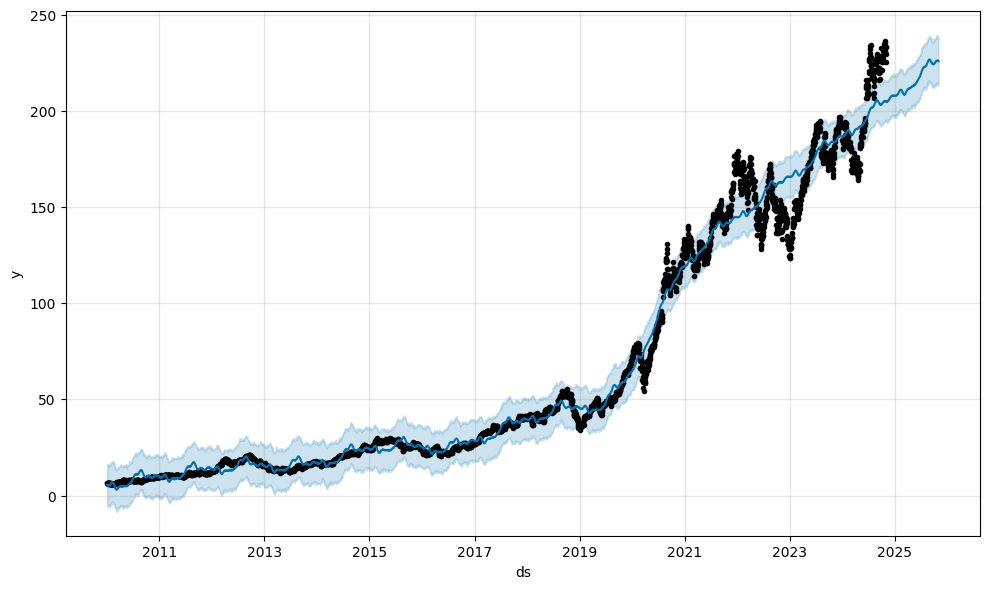

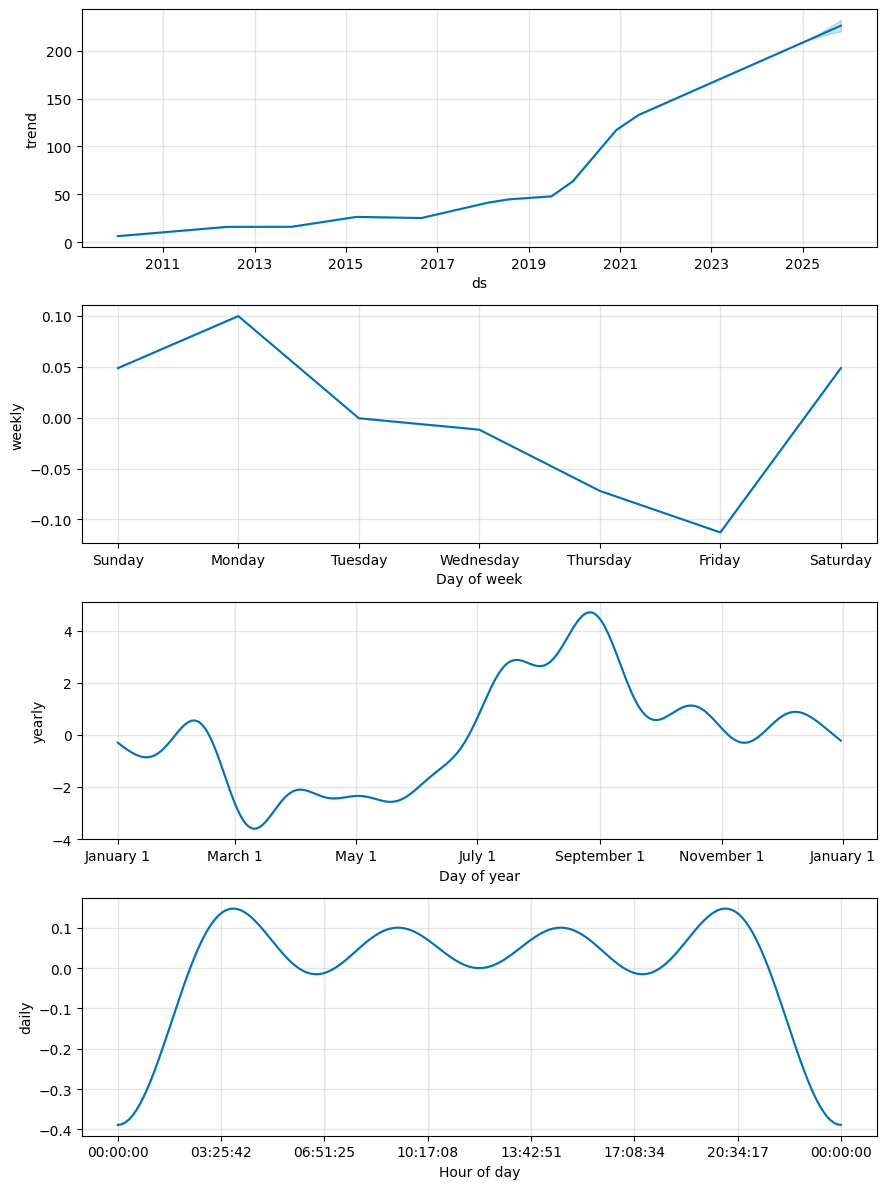

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Download historical Apple stock data
symbol = 'AAPL'
data = yf.download(symbol, start='2010-01-01', end='2024-11-01')

# Step 2: Prepare the data for Prophet
# Prophet expects a DataFrame with two columns: 'ds' (date) and 'y' (value to predict)
df = data[['Adj Close']]
df.reset_index(inplace=True)
df.columns = ['ds', 'y']
df['ds'] = df['ds'].dt.tz_localize(None)

df
# Step 3: Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Step 4: Make a dataframe for future dates (forecast horizon)
future = model.make_future_dataframe(periods=365)  # Forecast for 365 days ahead (1 year)

# Step 5: Predict future stock prices
forecast = model.predict(future)

# Step 6: Visualize the forecast
fig = model.plot(forecast)

# Step 7: Plot the forecast components (trend, weekly seasonality, yearly seasonality)
fig2 = model.plot_components(forecast)

# Step 8: Show the predictions for the next 10 days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


### v) LTSM

[*********************100%***********************]  1 of 1 completed


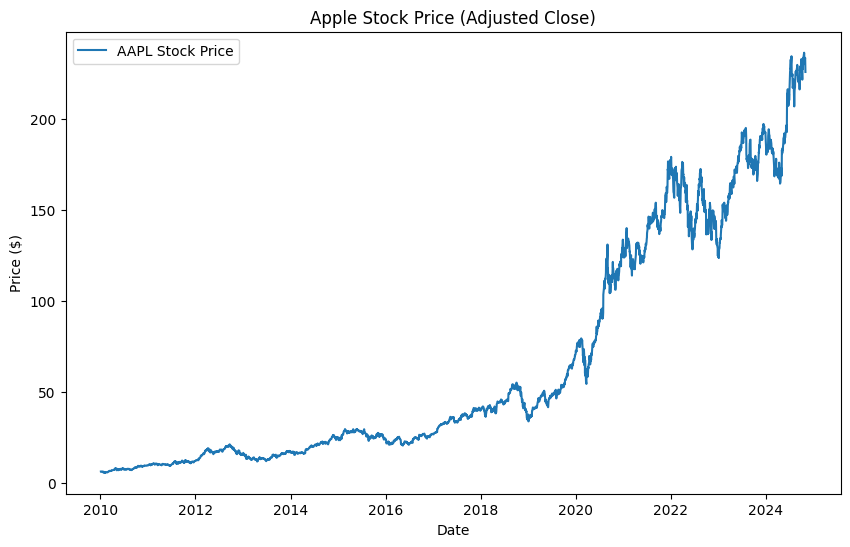

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 0.0134 - val_loss: 0.0023
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 1.0464e-04 - val_loss: 7.3032e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 7.9397e-05 - val_loss: 7.9619e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 8.8741e-05 - val_loss: 8.0835e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 8.6380e-05 - val_loss: 9.1798e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 7.7881e-05 - val_loss: 0.0013
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 8.4519e-05 - val_loss: 7.2062e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 7.0618e-05 - val_loss: 7.6712e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 6.2962e-05 - val_loss: 6.3551e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 6.3068e-05 - val_loss: 5.5964e-04
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


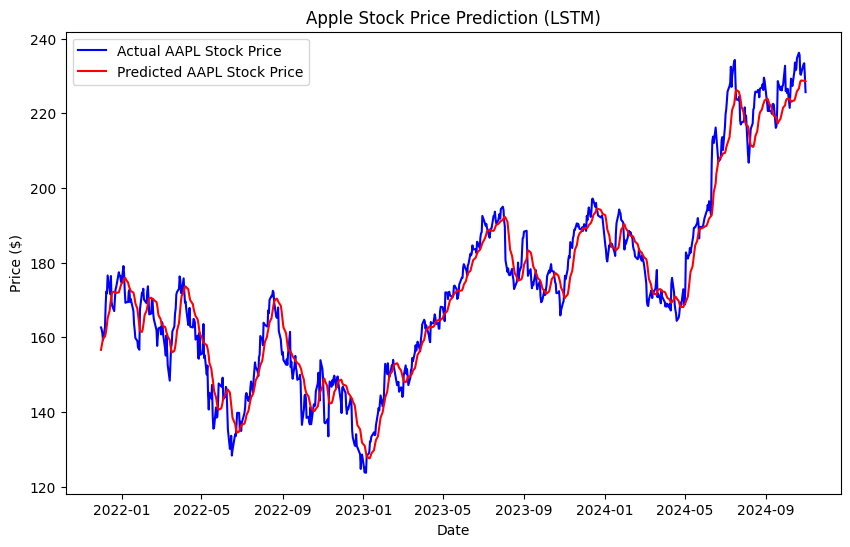

Last 10 predicted stock prices:
[[225.872  ]
 [226.66985]
 [227.58875]
 [228.43501]
 [228.74472]
 [228.78017]
 [228.71077]
 [228.73584]
 [228.80234]
 [228.57678]]


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Step 1: Download historical Apple stock data
symbol = 'AAPL'
data = yf.download(symbol, start='2010-01-01', end='2024-11-01')

# Step 2: Use adjusted close prices for prediction
data = data[['Adj Close']]

# Step 3: Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['Adj Close'], label='AAPL Stock Price')
plt.title('Apple Stock Price (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Step 4: Normalize the data (scaling the stock prices between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare the data for the LSTM model
# We create sequences of data where each input is a sequence of past stock prices (X) and the target is the next stock price (y)

def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])  # Previous 'window_size' prices as the input
        y.append(data[i, 0])  # The next price as the target
    return np.array(X), np.array(y)

window_size = 60  # We will use 60 previous days to predict the next day
X, y = create_sequences(scaled_data, window_size)

# Step 6: Reshape X for LSTM (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 8: Build the LSTM model
model = Sequential()

# LSTM layer with 50 units and return_sequences=False for the last LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Dense layer to output the predicted stock price
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Make predictions on the test set
predictions = model.predict(X_test)

# Step 11: Inverse transform the predictions and actual values back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 12: Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual AAPL Stock Price', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted AAPL Stock Price', color='red')
plt.title('Apple Stock Price Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Step 13: Print the last 10 predicted values
print("Last 10 predicted stock prices:")
print(predictions[-10:])


## 7) Conclusion

+ Stock value worth
+ Pontential Risks
+ Stock undervalued/overvalued/fairly-valued
+ Long-term/short-term

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
!curl https://loca.lt/mytunnelpassword

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.10.213:8501

your url is: https://icy-toys-say.loca.lt
2024-11-05 04:15:36.541 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 37, in <module>
    main()
  File "/content/app.py", line 18, in main
    data = fs.load_data(ticker, start_date, end_date)
  File "/content/functions.py", line 8, in load_data
    df = pd.read_csv("all_stock_data.csv")
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer